# Exploratory data analysis, EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

RAND = 42

- item_id : item id wich can be used later to merge with other IKEA dataframes
- name: the commercial name of items
- category: the furniture category that the item belongs to (Sofas, beds, chairs, Trolleys,…)
- Price: the current price in Saudi Riyals as it is shown in the website by 4/20/2020
- old_price: the price of item in Saudi Riyals before discount
- Short_description: a brief description of the item
- full_Description: a very detailed description of the item. Because it is long, it is dropped from the final dataframe, but it is available in the code in case it needs to be analyzed.
- designer: The name of the designer who designed the item. this is extracted from the full_description column.
- size: the dimensions of the item including a lot of details.As a lot of dimensions mentioned and they vary from item to item, the most common dimensions have been extracted which are: Height, Wideh, and Depth. This column is dropped from the final dataframe, but it is available in the code in case it is needed.
- width: Width of the item in Centimeter
- height: Height of the item in Centimeter
- depth: Depth of the item in Centimeter
- sellable_Online: if the item is available for online purchasing or in-stores only (Boolean)
- other_colors: if other colors are available for the item, or just one color as displayed in the website (Boolean)
- link: the web link of the item


**Какие типы задач можно решать с данным датасетом:**

- Регрессия: Прогнозирование продажной цены новых товаров
- Классификация: Предсказать категорию новых товаров
- Классификация: Предсказать, будет ли товар со скидкой

1) Прочитать файл IKEA_SA_Furniture_Web_Scrapings.csv и записать в переменную df

In [3]:
df = pd.read_csv('IKEA_SA_Furniture_Web_Scrapings.csv')

2) Первые пять строк

In [4]:
df.head()

# какой-то европейский интернет магазин мебели..как будто ИКЕА =)
# в таблице сразу видно пропуски данных (старая цена, глубина, высота, ширина)
# есть как числовые, так и булевые и категориальные признаки

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


3) Размер датасета

In [5]:
df.shape

(3694, 13)

4) Общая информация о датафрейме при помощи метода info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 350.0+ KB


5) Проанализировать кол-во пропусков, а также посмотреть сколько это в процентах от размера датасета (кол-ва строк)

In [7]:
no_null_df = df.isna().sum()[df.isna().sum() > 0]  

pdf = pd.DataFrame(no_null_df, columns=['Количество пропусков'])
pdf['Доля от общего количества строк, %'] = round(no_null_df[[i for i in no_null_df.index]] / df.shape[0]* 100, 2)
pdf['Доля от количества всех записей, %'] = round(no_null_df[[i for i in no_null_df.index]] / (df.shape[0]*df.shape[1]) * 100, 2)
pdf.loc["Всего"] = [no_null_df.sum(), round(df[df.isna().sum(axis=1) > 0].shape[0] / df.shape[0] * 100, 2), round(no_null_df.sum() / (df.shape[0] * df.shape[0])* 100, 2)]
pdf

# Доля от общего количества строк показывает процент пропусков в каждом из столбцов, а также общий процент строк с пропусками
# Например, в столбце depth 39,6 % пропусков, а по отношению ко всем записям во всей таблице - это 3,05 %.
# При этом, 48,59 % строк всей таблицы имеют пропуски (могут быть пропуски в нескольких столбцах в одной и той же строке),
# но от всего количества записей в таблице доля всех пропусков составляет всего 0,02 %.

,Количество пропусков,"Доля от общего количества строк, %","Доля от количества всех записей, %"
depth,1463.0,39.60,3.05
height,988.0,26.75,2.06
width,589.0,15.94,1.23
Всего,3040.0,48.59,0.02


6) Вывести основные описательные статистики для числовых признаков

In [8]:
df.iloc[: ,1:].describe()

,price,depth,height,width
count,3694.000000,2231.000000,2706.000000,3105.000000
mean,1078.208419,54.379202,101.679970,104.470853
std,1374.652494,29.958351,61.097585,71.133771
min,3.000000,1.000000,1.000000,1.000000
25%,180.900000,38.000000,67.000000,60.000000
50%,544.700000,47.000000,83.000000,80.000000
75%,1429.500000,60.000000,124.000000,140.000000
max,9585.000000,257.000000,700.000000,420.000000


7) Вывести основные описательные статистики для булевых и категориальных признаков

In [9]:
df.describe(include=["object", "bool"])

,name,category,old_price,sellable_online,link,other_colors,short_description,designer
count,3694,3694,3694,3694,3694,3694,3694,3694
unique,607,17,365,2,2962,2,1706,381
top,BESTÅ,Tables & desks,No old price,True,https://www.ikea.com/sa/en/p/norraker-norraker...,No,Chair,IKEA of Sweden
freq,173,612,3040,3666,4,2182,59,828


8) Проанализировать признак old_price, посмотреть на **уникальные значения** (понадобится в следующем задании)

In [12]:
print(df.old_price.value_counts(ascending=True).tail(5)) 
print()
#print(*df.old_price.unique(), sep='\n')
print(f"В столбце очень много (3040) значений, которые можно считать также пропущенными.Кроме No old price есть варианты написания: \nSR 175/2 pack \nSR 4,750 \nSR 145")

old_price
SR 275             8
SR 595            10
SR 1,385          11
SR 995            12
No old price    3040
Name: count, dtype: int64

В столбце очень много (3040) значений, которые можно считать также пропущенными.Кроме No old price есть варианты написания: 
SR 175/2 pack 
SR 4,750 
SR 145


9) Функция получения цены из признака **old_price** (преобразование значений признака в этой же колонке). 

Пояснение:

- Если имеем значение = 'No old price' в old_price, то оставляем исходную цену, то есть берем значение из признака **price**
- Там, где присутствует значение **pack** в old_price, нужно просто убрать все то, что идет после знака /
- Например, цена SR 5,640 в old_price читается как SR 5640 (то есть без запятой), по итогу должны получить новое значение 5640
- На вход должны подаваться значения старой и новой цены

In [13]:
# data_old - значение из old_price
# data_price - значение из price
# return transform old_price

def change_old_price(data_old: str, data_price: float) -> float:
    """
    Меняет старые значения на новые.
    Если имеем значение = 'No old price', то берем значение из data_price.
    Там, где присутствует значение pack убрает все то, что идет после знака /.
    Цена SR 5,640 заменяется на новое значение 5640.
    На вход должны подаваться значения старой и новой цены.
    """
    
    if data_old == 'No old price':
        data_old = data_price
    elif isinstance(data_old, str) and 'SR ' in data_old:
        data_old = data_old[3:]
        if data_old[-1] == 'k':
            data_old = data_old[:-7]
        data_old = data_old.replace(",",'')
    try:
        return float(data_old)
    except:
        raise ValueError("Строка не может быть преобразована в целое число") 
        
    

10) Генерация и преобразование признаков
- Создать признак **flg_old_price**, где 0 - это означает, что есть значение **'No old price'** в признаке **old_price**, иначе поставить 1 (флаг)
- Преобразовать признак **old_price** при помощи написанной функции **change_old_price()** в задании 9
- Создать признак **discount_amount = старая цена - цена**


In [14]:
df['flg_old_price'] = df.old_price != 'No old price'
df['flg_old_price'] = df['flg_old_price'].astype(int)
df.old_price = df.apply(lambda x: change_old_price(x['old_price'], x['price']), axis=1)
df['discount_amount'] = df.old_price - df.price

In [15]:
df.head(15)

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,flg_old_price,discount_amount
0,90420332,FREKVENS,Bar furniture,265.0,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,0,0.0
1,368814,NORDVIKEN,Bar furniture,995.0,995.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,0,0.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,0,0.0
3,80155205,STIG,Bar furniture,69.0,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,0,0.0
4,30180504,NORBERG,Bar furniture,225.0,225.0,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0,0.0
5,10122647,INGOLF,Bar furniture,345.0,345.0,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0,0,0.0
6,70404875,FRANKLIN,Bar furniture,129.0,129.0,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0,0,0.0
7,60155602,DALFRED,Bar furniture,195.0,195.0,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,"Bar stool, 63-74 cm",Sarah Fager,50.0,NaN,50.0,0,0.0
8,50406465,FRANKLIN,Bar furniture,129.0,129.0,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0,0,0.0
9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,2375.0,True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN,1,199.0


<div class="alert alert-block alert-success">
    
Представим, что мы будем решать задачу регрессии и на новых товарах предсказывать **новую** цену.

</div>

## 1 Гипотеза

- Старые и новые цены отличаются друг от друга, новые цены выше

Построить график распределения старой и текущих цен (уместить на одном графике), есть ли видимые отличия?

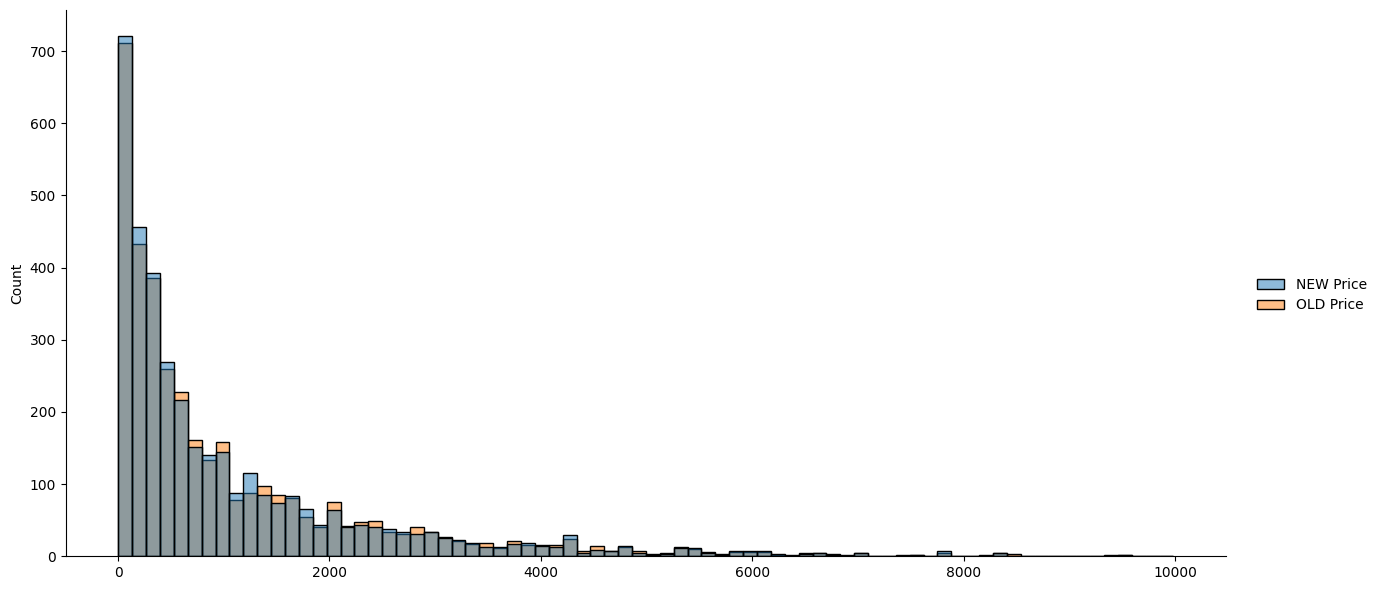

In [16]:
sns.displot(
    {
        "NEW Price": df.price,
        "OLD Price": df.old_price,
    },
    kind="hist",
    common_norm=False,
    height=6,
    aspect=2.1)
plt.show()

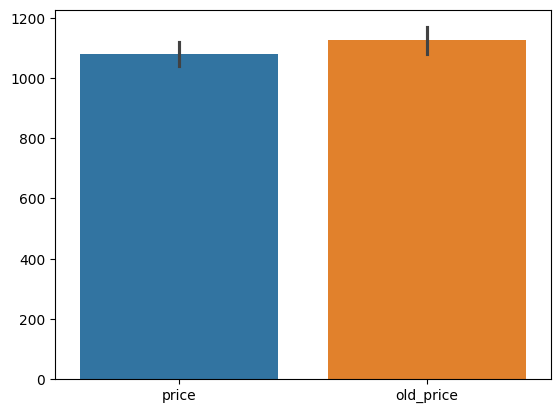

In [17]:
sns.barplot(data=[df.price, df.old_price]);

**Выводы:**

- Да, цены действительно отличаются
- Нет, не все новые цены выше старых. Суммарная стоимость товаров ниже по новым ценам в сравнении со старыми ценами

## 2 Гипотеза

- Текущие цены онлайн и оффлайн не отличаются в разрезе наличия скидки (можно использовать признак flg_old_price)

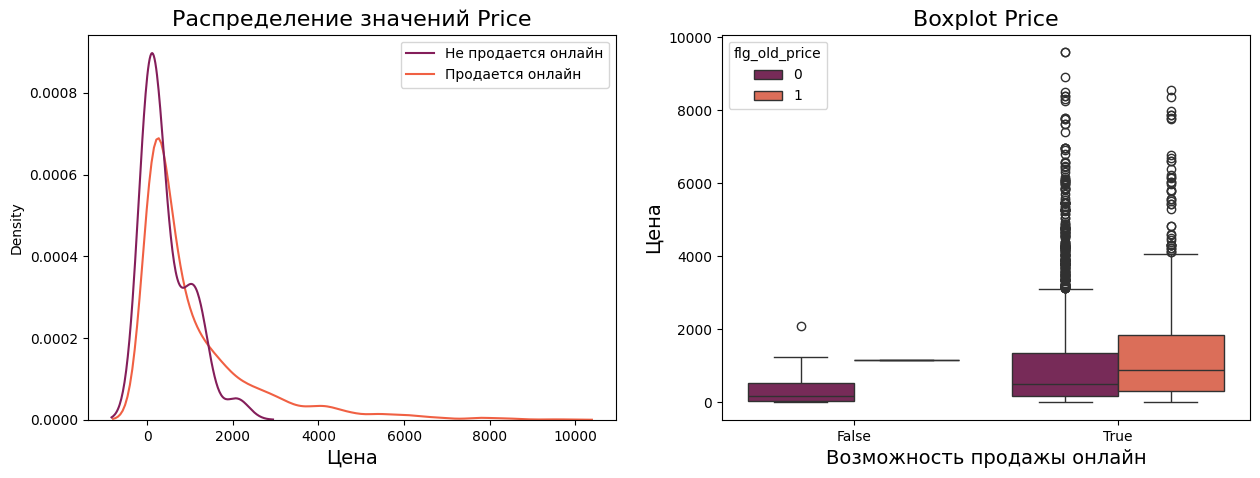

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.kdeplot(
    data={
        "Не продается онлайн": df[df.sellable_online == False].price,
        "Продается онлайн": df[df.sellable_online == True].price
    },
    common_norm=False,
    palette='rocket',
    ax=axes[0])
axes[0].set_title('Распределение значений Price', fontsize=16)
axes[0].set_xlabel('Цена', fontsize=14)


sns.boxplot(
    x='sellable_online', 
    y='price', 
    data=df, 
    palette='rocket', 
    ax=axes[1], 
    hue='flg_old_price')

axes[1].set_title('Boxplot Price', fontsize=16)
axes[1].set_ylabel('Цена', fontsize=14)
axes[1].set_xlabel('Возможность продажы онлайн', fontsize=14)
plt.show()

**Выводы:**

- Данные распределены ненормально. Из графика распределния видно, что цены онлайн выше. Макс. офлайн цена около 3000, макс. цена онлайн доходит почти до 10000. Можно также заметить экстремальные значения у товаров онлайн.
- Почти все скидки действуют только на онлайн товары. При этом медиана цены онлайн товаров со скидкой выше медианы цены онлайн товаров без скидки.

## 3 Гипотеза

- Цены на товары, которые имеют несколько цветов, больше (многообразие цветов связано со значением цены)

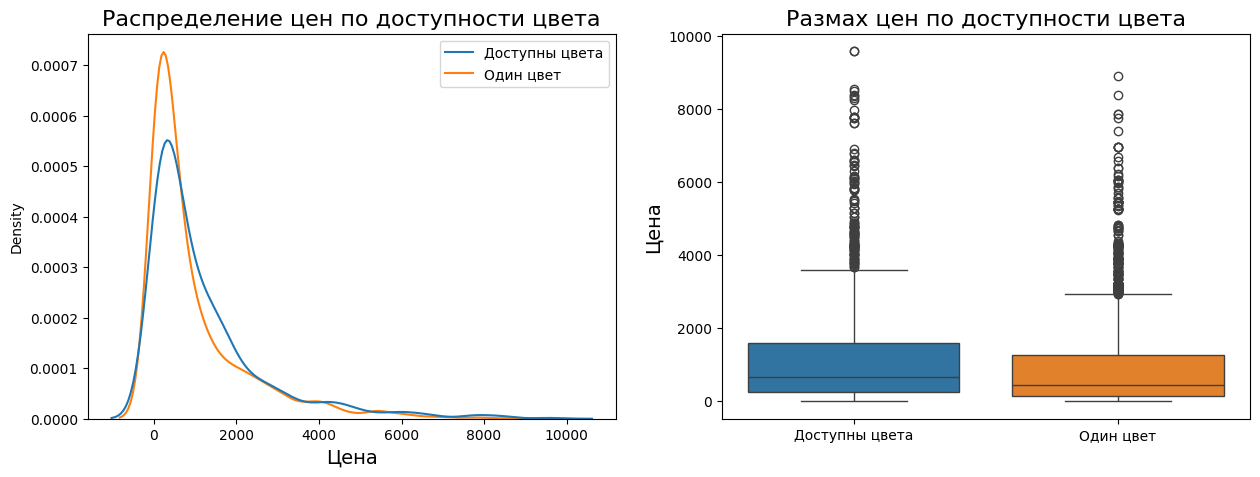

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.kdeplot(
    data={
        "Доступны цвета": df[df.other_colors == 'Yes'].price,
        "Один цвет": df[df.other_colors == 'No'].price
    },
    common_norm=False,
    ax=axes[0])

axes[0].set_title('Распределение цен по доступности цвета', fontsize=16)
axes[0].set_xlabel('Цена', fontsize=14)

sns.boxplot(data={
        "Доступны цвета": df[df.other_colors == 'Yes'].price,
        "Один цвет": df[df.other_colors == 'No'].price
    }, ax=axes[1])

axes[1].set_title('Размах цен по доступности цвета', fontsize=16)
axes[1].set_ylabel('Цена', fontsize=14)
plt.show()

**Выводы:**

- Товаров с одним цветом больше, но диапазон цен для цветных товаров, в среднем, выше, чем для одноцветных.
- Стоимость цветных товаров немного больше. Достпность цвета несколько влияет на стоимость товаров.

## 4 Гипотеза

- Цена товара зависит от категории товара

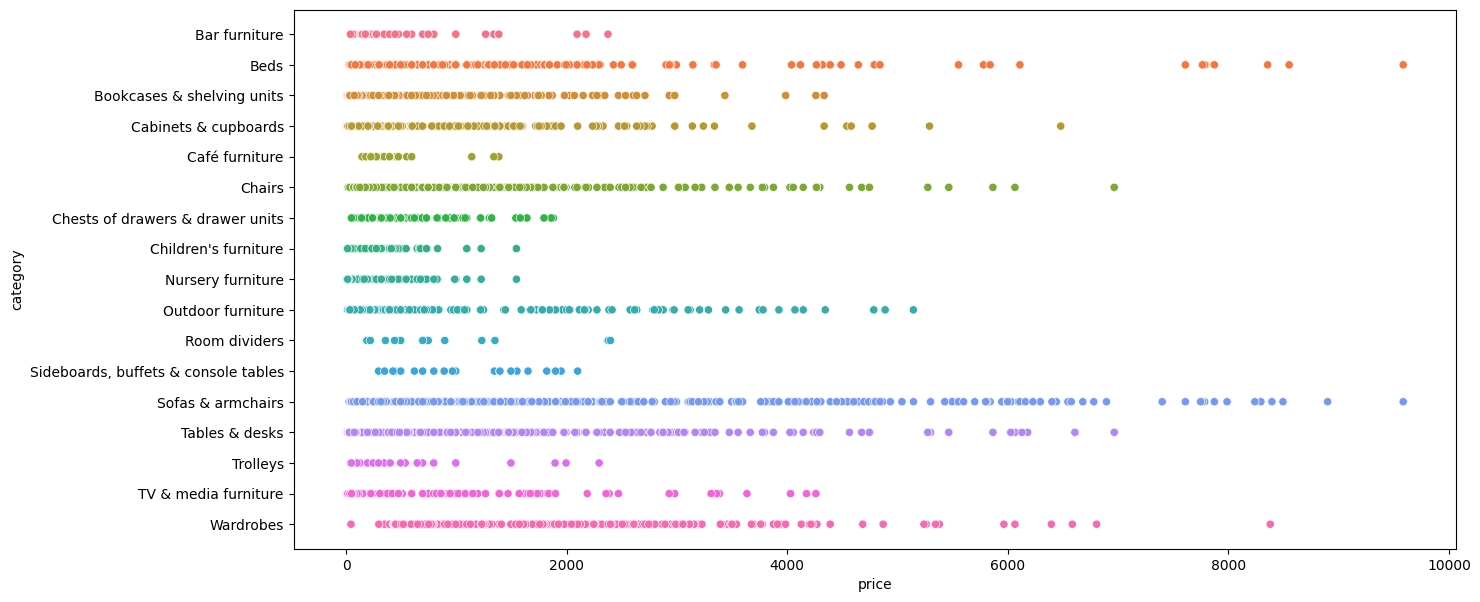

In [22]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='price', y='category', data=df, legend=False, hue='category');

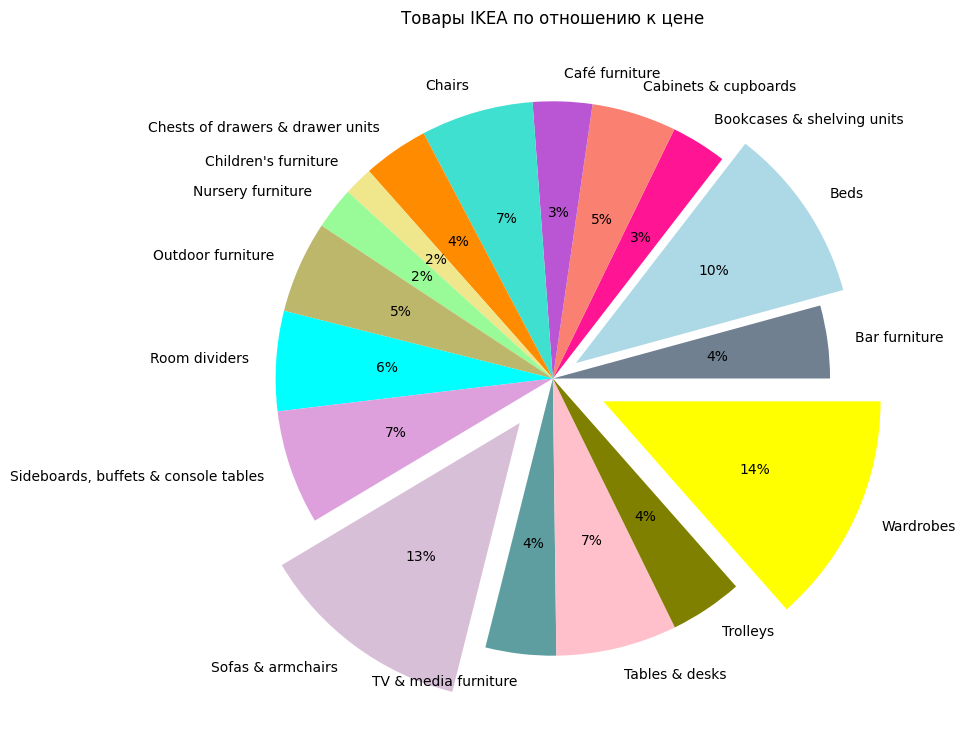

In [23]:
from sklearn.preprocessing import LabelEncoder
data = df.drop(['link', 'short_description', 'item_id', 'designer', 'name'], axis = 1)

#заменим значения
lab = LabelEncoder()
data['sellable_online'] = lab.fit_transform(data['sellable_online'])
#True = 1, False =0
data['other_colors'] = lab.fit_transform(data['other_colors'])
#No = 0,  Yes = 1
data2 = data.groupby(data['category']).mean()
dff = data2.reset_index()
x = dff.price
fig, ax = plt.subplots(figsize=(25, 9))

explode = [0,0.1,0,0,0,0,0,0,0,0,0,0,0.2,0,0,0,0.2]
colors = ['slategrey', 'lightblue','deeppink', 'salmon', 'mediumorchid', 'turquoise','darkorange','khaki', 'palegreen','darkkhaki','cyan','plum','thistle','cadetblue','pink','olive','yellow']

ax.pie(x, labels=dff.category, autopct='%.0f%%',explode=explode, colors=colors)
ax.set_title("Товары IKEA по отношению к цене")

plt.show();

**Выводы**

- из графика видно, что цены на шкафы для одежды, диваны/кресла, кровати намного выше цен на другие товары.

- на втором месте по величине стоимости кухонные шкафы,стулья и столы.

- дешевле всех стоят мебель детей и детских комнат, полки, мебель для кафе.

## 5 Гипотеза

- Цена товара зависит от габаритов товара

In [25]:
# заменим пропуски в габаритах на медианы значений из категории
df['width'] = df['width'].fillna(df.groupby('category')['width'].transform('median'))
df['height'] = df['height'].fillna(df.groupby('category')['height'].transform('median'))
df['depth'] = df['depth'].fillna(df.groupby('category')['depth'].transform('median'))


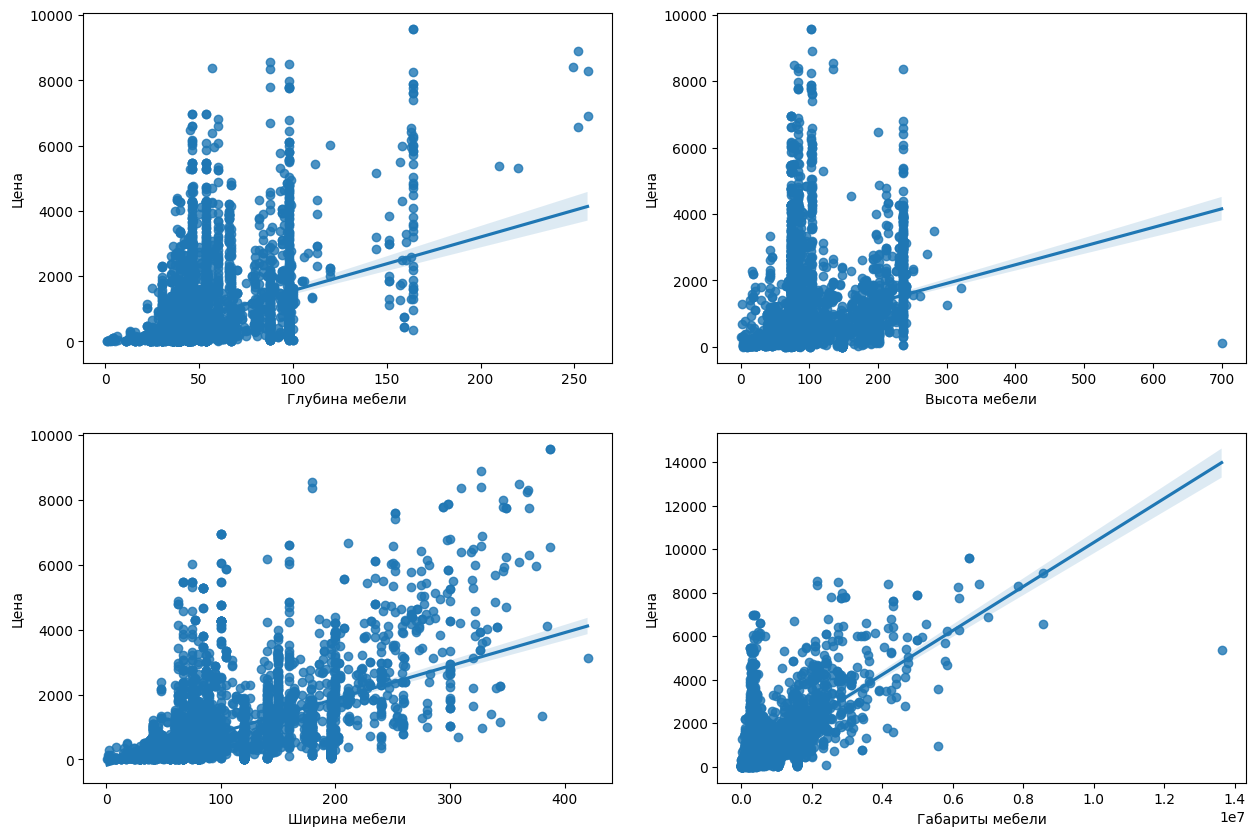

In [26]:
# посмотрим на зависимость цен от габаритов товара
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.regplot(x='depth', y='price', data=df, ax=axes[0][0], robust=True)
#plt.bar(x=df.depth, height=df.price)
axes[0][0].set_xlabel('Глубина мебели')
axes[0][0].set_ylabel('Цена')

sns.regplot(x='height', y='price', data=df, ax=axes[0][1], robust=True)
axes[0][1].set_xlabel('Высота мебели')
axes[0][1].set_ylabel('Цена')

sns.regplot(x='width', y='price', data=df, ax=axes[1][0], robust=True)
axes[1][0].set_xlabel('Ширина мебели')
axes[1][0].set_ylabel('Цена')

sns.regplot(x=round(df.width*df.height*df.depth), y=df.price, data=df, ax=axes[1][1], robust=True)
axes[1][1].set_xlabel('Габариты мебели')
axes[1][1].set_ylabel('Цена')

plt.show()

**Выводы**

- на цену сильно влияет ширина и глубина мебели (возмножно, связано с бОльшим местом, занимаемым на складе, т.е. накладывается еще и "стоимость" занимаемого места на скаладе).

- цена и общие габариты мебели имеют практически линейную заисимость (больше габариты - больше цена).

<Figure size 1000x500 with 0 Axes>

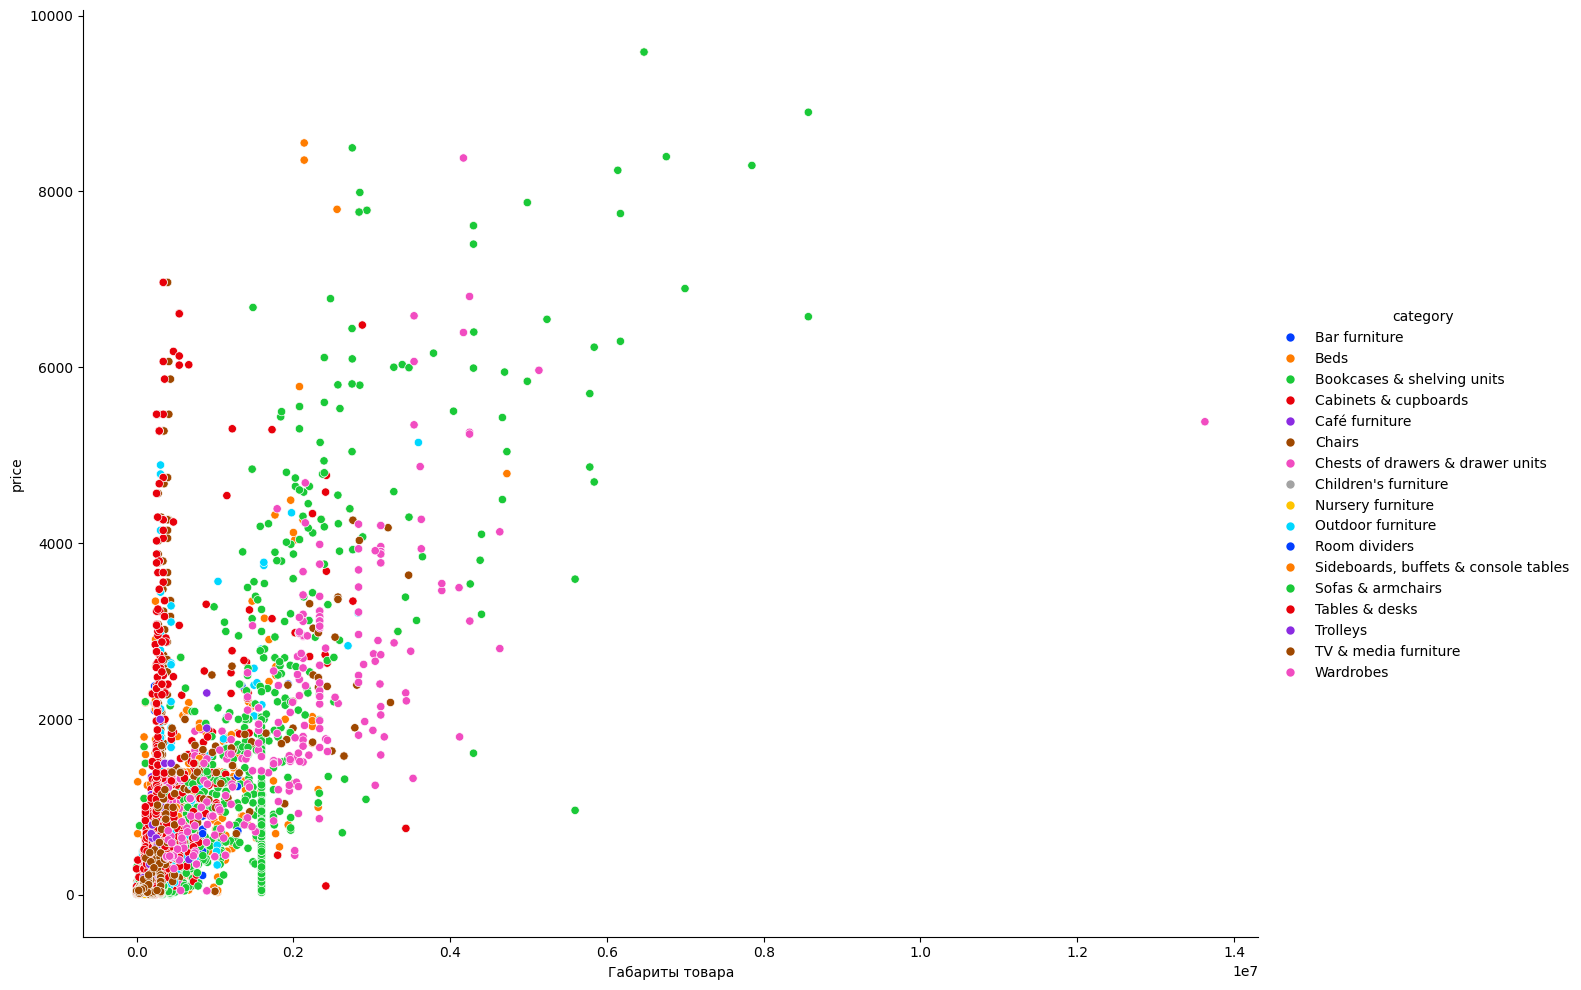

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.relplot(
    x=round(df.width*df.height*df.depth), 
    y='price', 
    data=df,
    palette='bright',
    height=10, aspect=1.3,
    kind='scatter', 
    hue='category') # указывает количество столбцов для измерений в одной визуализации
ax.set_xlabels('Габариты товара')
plt.show()

**Выводы**

- очень сильно на цену влияют габариты в категориях "диваны/кресла", "шкафы для одежды", "кровати", "стулья".


## 6 Гипотеза

- Крупные и дорогие товары будут стараться продать быстрее, поэтому здесь скидок будет больше и она будет максимальной в этих категориях

In [29]:
# посмотрим на что больше всго установили скидку
df.groupby(['discount_amount','category']).max().tail(25)

,,item_id,name,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,flg_old_price
discount_amount,category,,,,,,,,,,,,,
1055.0,Sofas & armchairs,19240062,NORSBORG,4220.0,5275.0,True,https://www.ikea.com/sa/en/p/norsborg-corner-s...,Yes,"Corner sofa, 4-seat",Ehlén Johansson,98.0,85.0,309.0,1
1080.0,Beds,29277724,VALLENTUNA,4320.0,5400.0,True,https://www.ikea.com/sa/en/p/vallentuna-2-seat...,Yes,2-seat modular sofa w 2 sofa-beds,Ehlén Johansson,113.0,84.0,186.0,1
1112.0,Sofas & armchairs,9277782,VALLENTUNA,4448.0,5560.0,True,https://www.ikea.com/sa/en/p/vallentuna-3-seat...,Yes,3-seat modular sofa with sofa-bed,IKEA of Sweden/Fredriksson/L Löwenhielm/Hillan...,98.0,84.0,266.0,1
1122.0,Beds,49277105,VALLENTUNA,4488.0,5610.0,True,https://www.ikea.com/sa/en/p/vallentuna-3-seat...,Yes,3-seat modular sofa with sofa-bed,Fredriksson/L Löwenhielm/Hilland,88.0,84.0,266.0,1
1138.0,Beds,59250756,LAUVIK,2902.0,4040.0,True,https://www.ikea.com/sa/en/p/lauvik-divan-bed-...,Yes,"Divan bed, 160x200 cm",Synnöve Mork/Ola Wihlborg/IKEA of Sweden,88.0,120.0,160.0,1
1145.0,Sofas & armchairs,89239786,NORSBORG,4580.0,5725.0,True,https://www.ikea.com/sa/en/p/norsborg-corner-s...,Yes,"Corner sofa, 5-seat",Ehlén Johansson,88.0,85.0,285.0,1
1151.0,Sofas & armchairs,29277960,VALLENTUNA,4604.0,5755.0,True,https://www.ikea.com/sa/en/p/vallentuna-modula...,Yes,"Modular corner sofa, 3-seat",Fredriksson/L Löwenhielm/Hilland,93.0,84.0,266.0,1
1252.0,Tables & desks,99288069,BEKANT,6128.0,7380.0,True,https://www.ikea.com/sa/en/p/bekant-desk-with-...,Yes,"Desk with screen, 320x160 55 cm",K Malmvall/E Lilja Löwenhielm,46.0,74.0,160.0,1
1325.0,Sofas & armchairs,49277978,VALLENTUNA,5300.0,6625.0,True,https://www.ikea.com/sa/en/p/vallentuna-modula...,Yes,Modular corner sofa 3-seat+sofa-bed,IKEA of Sweden/Fredriksson/L Löwenhielm/Hilland,93.0,84.0,266.0,1


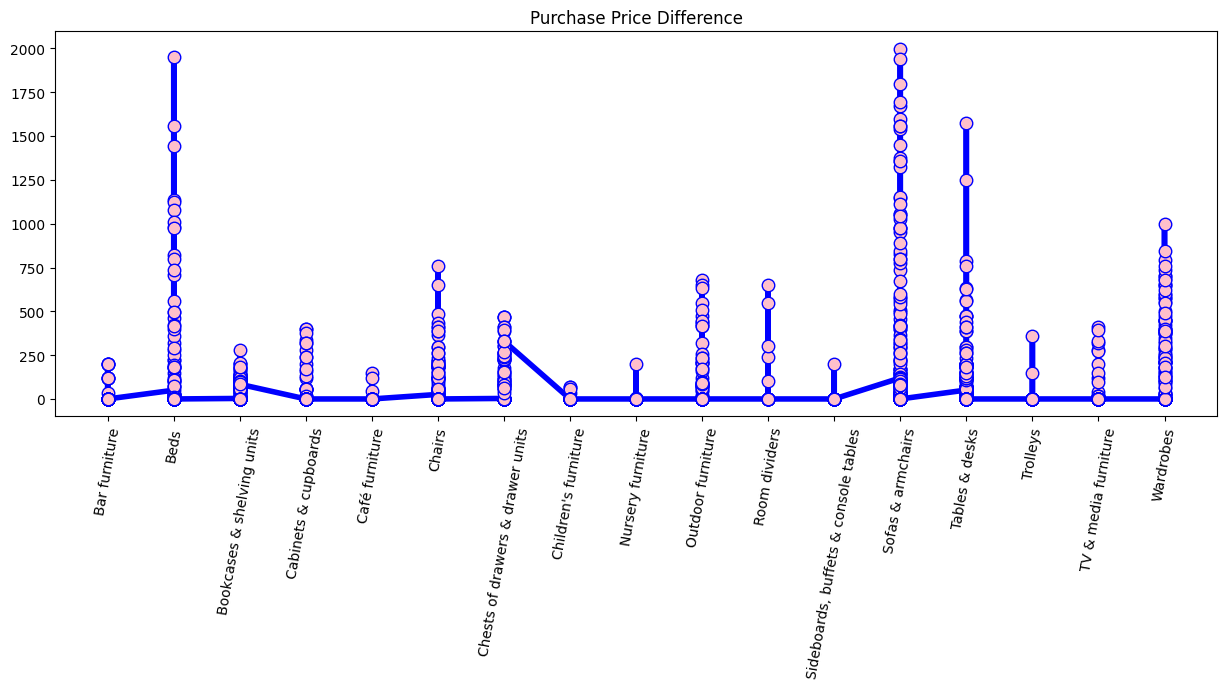

In [30]:
plt.figure(figsize=(15, 5))
ax = plt.plot(df.category, df.discount_amount, 'b-o', lw=4, ms=9,  markerfacecolor='pink')
plt.title("Purchase Price Difference")
plt.xticks(rotation=80)
plt.show()

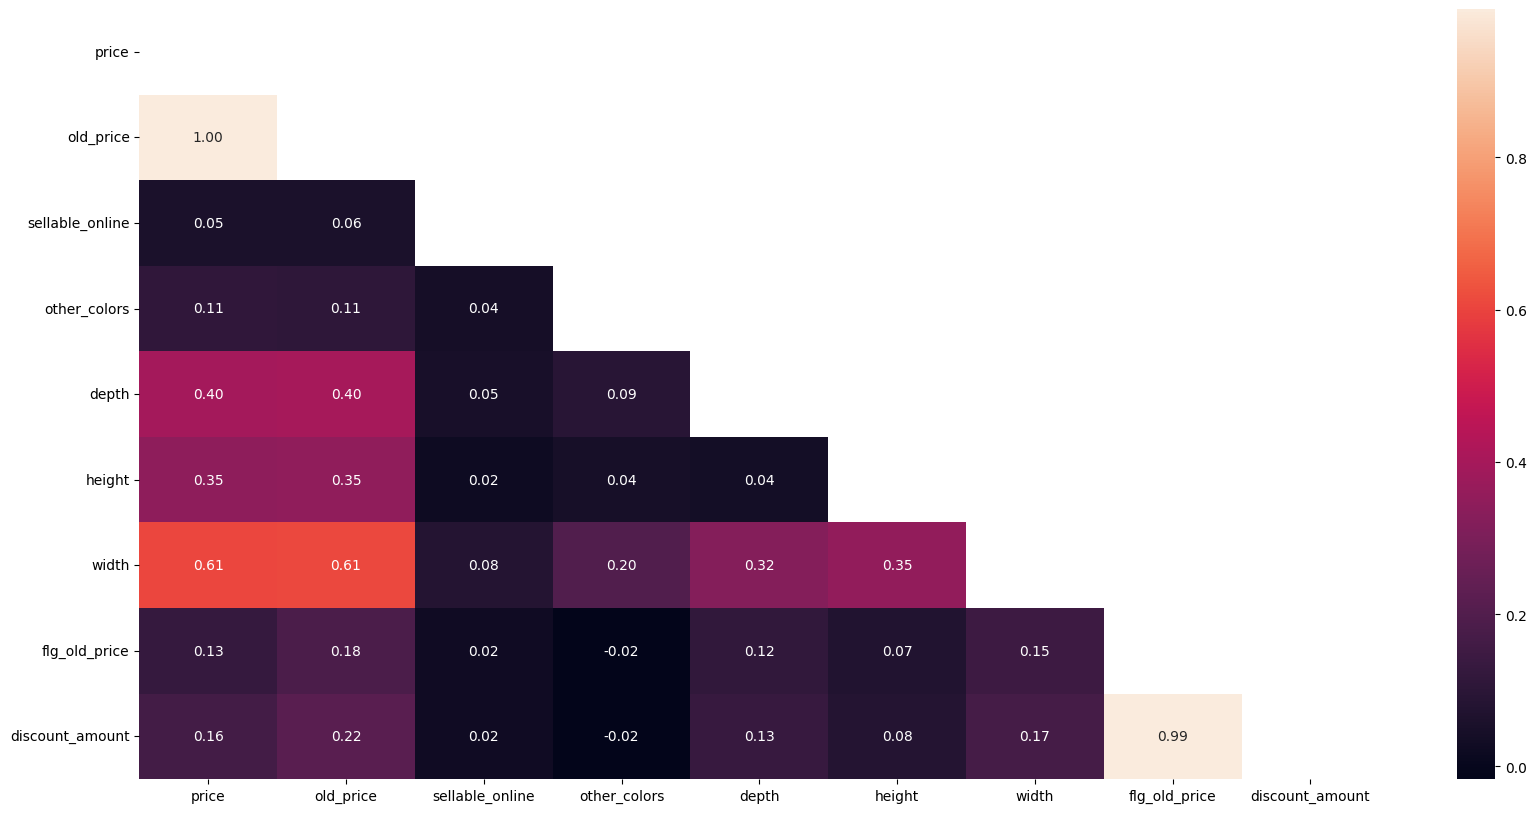

In [31]:
# посмотрим на матрицу корреляции признков с целевой переменной 
# заменим значения
lab = LabelEncoder()
df['sellable_online'] = lab.fit_transform(df['sellable_online'])
#True = 1, False =0
df['other_colors'] = lab.fit_transform(df['other_colors'])
df = df.drop(['link', 'short_description', 'item_id', 'designer', 'name', 'category'], axis = 1)

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(method='spearman'), fmt='.2f', robust=True, annot=True, mask=np.triu(df.corr(method='spearman')));


**Выводы**

- как и предполагалось, цена сильно коррелирует с габаритами
- на большие и дорогие товары скидок больше

# Общий итог

- В ассортименте ИКЕА 3694 товара, специализирующихся на 17 различных категориях мебели, из которых шкафы-купе, Диваны и кресла, Столы и конторские бюро имеют более высокую закупочную цену по сравнению с более ранними ценами.
- Почти 3666 товаров из 3694 доступны и продаются онлайн. Однако только у 1512 из них есть варианты цвета на выбор.
- Для некоторых товаров, таких как кровати, шкафы-купе, диваны и кресла, мебель для кафе, перегородки, технические характеристики, особенно высота, глубина и ширина, играют решающую роль в определении стоимости.
- Кровати, шкафы-купе, диваны - самая дорогая категория из всех товаров и это связано с габаритами.
- Закупочная цена (старая) на все товары выше, возможно, некоторые товары устарели из-за растущих изменений в предпочтениях, образе жизни и поведении потребителей.